### Medium Analysis #1

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [14]:
politics = pd.read_csv("./final_csvs/politics.csv", index_col = 0)
money = pd.read_csv("./final_csvs/money.csv", index_col = 0)
sports = pd.read_csv("./final_csvs/sports.csv", index_col = 0)
tech = pd.read_csv("./final_csvs/tech.csv")

In [10]:
politics.shape, money.shape, sports.shape, tech.shape

((3640, 11), (1779, 11), (2588, 10), (4122, 12))

## Analyzing Politics:

In [124]:
#there was a bug with the webscraping: people with 2020 claps have the wrong number of claps. 
#checked via website, having differing number of claps
politics = politics[politics.claps != 2020]

#get ratio of clap to followers, put as a new feature
clap_ratio = politics.claps / politics.followers

#get number of followers:
followers = politics.followers

#put the clap ratio as a new feature
politics["clap_ratio"] = clap_ratio

In [126]:
#see how many null values there are
politics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3414 entries, 0 to 3639
Data columns (total 12 columns):
url           3414 non-null object
title         3306 non-null object
author        3369 non-null object
username      3369 non-null object
user_since    3350 non-null float64
following     3369 non-null float64
followers     3374 non-null float64
published     3369 non-null object
claps         3414 non-null int64
text          3414 non-null object
tags          3414 non-null object
clap_ratio    3374 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 346.7+ KB


In [129]:
#sort the values for the followers based on followers
sorted_p = politics[["followers", "clap_ratio"]].sort_values("followers").reset_index(drop=True).dropna()


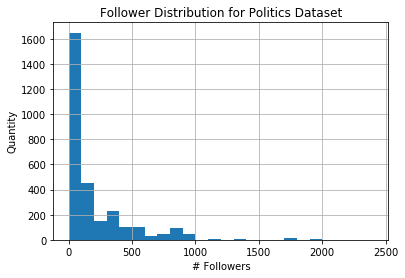

In [476]:
#the distribution of followers:
sorted_p.hist("followers", bins = np.arange(0, 2500, 100));
plt.title("Follower Distribution for Politics Dataset");
plt.xlabel("# Followers");
plt.ylabel("Quantity");

In [131]:
#percentiles...
np.percentile(perc.followers, q = 5),np.percentile(perc.followers, q = 25), np.percentile(perc.followers, q = 50), np.percentile(perc.followers, q = 75), np.percentile(perc.followers, q = 100)

(4.0, 26.0, 110.0, 425.0, 77207091677.0)

In [407]:
def plot_scatter(p, c1, c2, p1, p2):
    """Create scatter plot based on percentile range for c1
    p: databased name
    c1: category 1
    c2: category 2
    p1: lower bound percentile
    p2: upper bound percentile
    """
    #too much flux when followers less than 10.
    p1_ = np.percentile(p[c1], q = p1)
    p2_ = np.percentile(p[c1], q = p2)
    p = p[p[c1] < p2_]
    p = p[p[c1] > p1_]
    return p.plot.scatter(x = c1, y= c2)
    

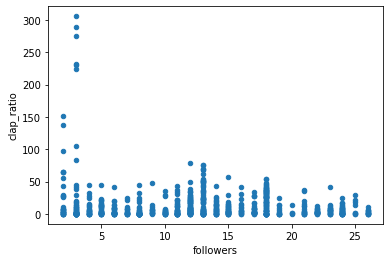

In [411]:
# Q1 follower to clap ratio plotted over follower count
plot_scatter(sorted_p, "followers", "clap_ratio", 0, 25)

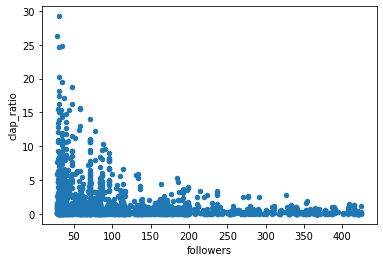

In [410]:
#clap to follower ratio for inner quartiles (since bottom quartile/upper quartile are more variable)
# a nice trend
plot_scatter(sorted_p, "followers", "clap_ratio",25, 75)

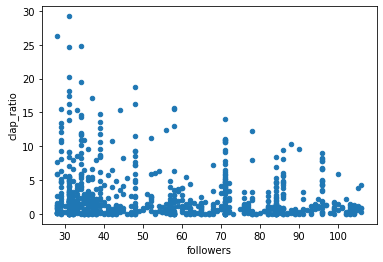

In [419]:
#Q2
plot_scatter(sorted_p, "followers", "clap_ratio", 25, 50);

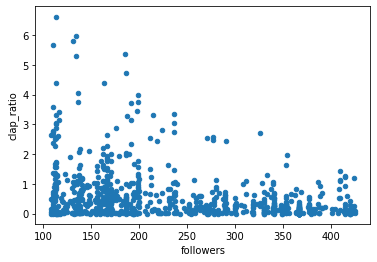

In [421]:
#Q3
#beware the changes in the scale for y axis
plot_scatter(sorted_p, "followers", "clap_ratio", 50, 75);

Not a ratio but absolute values comparison:

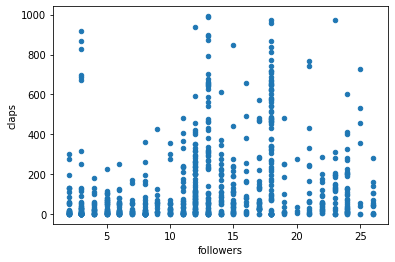

In [423]:
abs_p = politics[["followers", "claps"]].sort_values("followers").reset_index(drop=True).dropna()
plot_scatter(abs_p, "followers", "claps", 0, 25);

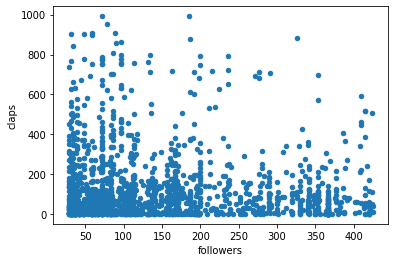

In [424]:
#Q2-Q3
plot_scatter(abs_p, "followers", "claps", 25, 75);

### Money:

In [465]:
#there was a bug with the webscraping: people with 2020 claps have the wrong number of claps. 
#checked via website, having differing number of claps
money = money[money.claps != 2020]

#get ratio of clap to followers, put as a new feature
clap_ratio = money.claps / money.followers

#get number of followers:
followers = money.followers

#put the clap ratio as a new feature
money["clap_ratio"] = clap_ratio

In [466]:
#sort the values for the followers based on followers
sorted_m = money[["followers", "clap_ratio"]].sort_values("followers").reset_index(drop=True).dropna()


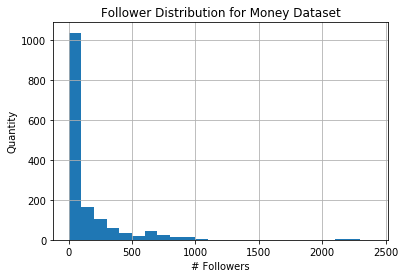

In [477]:
#the distribution of followers:
sorted_m.hist("followers", bins = np.arange(0, 2500, 100));
plt.title("Follower Distribution for Money Dataset");
plt.xlabel("# Followers");
plt.ylabel("Quantity");

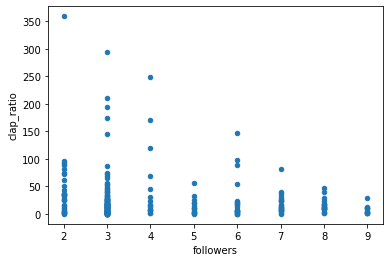

In [468]:
# Q1 follower to clap ratio plotted over follower count
plot_scatter(sorted_m, "followers", "clap_ratio", 0, 25);

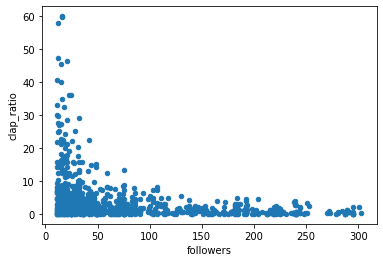

In [469]:
# Q2-Q3 follower to clap ratio plotted over follower count for centralized features
plot_scatter(sorted_m, "followers", "clap_ratio", 25, 75);

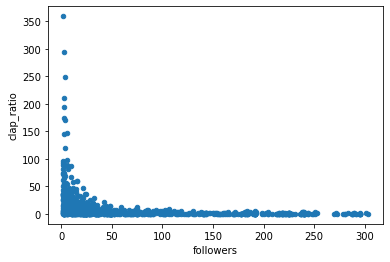

In [471]:
# Q1 follower to clap ratio plotted over follower count
plot_scatter(sorted_m, "followers", "clap_ratio", 0, 75);

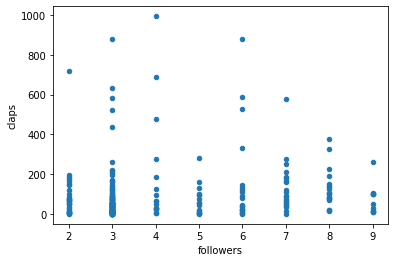

In [472]:
abs_m = money[["followers", "claps"]].sort_values("followers").reset_index(drop=True).dropna()
plot_scatter(abs_m, "followers", "claps", 0, 25);

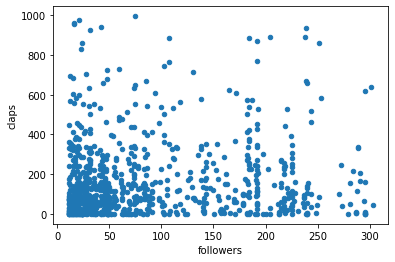

In [473]:
plot_scatter(abs_m, "followers", "claps", 25, 75);

There seems to be a definite downwards trend for both money and politics where the ratio of claps to follower ratio decreases as the follower count increases. This makes sense as the more followers a person has the harder it is to get double or triple that amount of claps. But, looking at the absolute values of claps vs the amount of followers it seems as though there is also a negative trend (albeit not as strong). This is interesting as we assumed that people with more followers tended to get more claps in general as they have more followers. But there is no clear positive correlation as expected. There is definitely a right skew to both graphs of followers as most people have only a few followers in comparison to a few that have many followers.

# Analysis 2: Looking at Title Words

### Money Analysis:

In [392]:
#average number of claps
average_claps = money.claps.mean()
average_claps

161.20629567172568

In [296]:
#put all titles into one string
money_titles = (money.title.astype(str)+ " ").sum()

In [379]:
#all the words in the money article titles:
#remove all punctuation

def remove_punc(string_with_punc):
    """Take a string in with punctuation and remove punctuation. 
    returns: list of words"""
    s = string_with_punc.replace("?", "").replace("!", "").replace(",", "").replace("'", "").replace("\"", "").replace(".", "").replace(":", "")
    s = re.sub("\d{1,3}", "", s)
    s = s.replace("‘", "").replace("’", "").replace("|","").replace("$", "").replace("“", '').replace("”", "").replace("-", " ").replace('&amp;', "").replace("   ", " ").replace("%", "").replace("/", " ").replace(")", "").replace("(", "").replace("…", "").replace("—", "").replace("  ", "")
    s = s.lower()
    s = s.split(" ")
    return s

mon_words = remove_punc(money_titles)


In [429]:
#stop words
import nltk
from nltk.corpus import stopwords

def remove_stops(input_words):
    """function to get rid of stop words and get top 15 words
    returns: top_15 words with counts"""
    words = pd.Series(input_words)

    word_counts = words.value_counts().reset_index()
    word_counts.columns = ["word", "count"]

    stops = stopwords.words("english")

    #some stop words have apostrophies but take out in string cleaning so take out here as well
    stops = pd.Series(stops).str.replace("'", "").values
    
    #where the stop words are, drop from table 
    stop_word_location = ~word_counts["word"].isin(stops) 
    
    #get top 15 words
    top_15 = word_counts[stop_word_location].reset_index(drop= True)[:15]
    
    return top_15

top_15 = remove_stops(mon_words)

,word,count
0,money,229
1,financial,93
2,debt,80
3,make,59
4,investing,57
5,stock,48
6,save,43
7,market,40
8,need,40
9,stocks,37


bsullivan@fieldlevel.com
codeitforward.com

In [456]:
def get_average_claps(top_15, df):
    """Get the average clap amount for the top 15 words. (along with their true frequency in titles)"""
    
    #dictionary to keep number of claps
    title_claps = {}

    for i in top_15.word: #for each word in the top 15
        #get df with only titles with word in it
        claps = df[df.title.str.lower().str.contains(i) == True].claps
        #get the mean number of claps
        avg_claps = claps.mean()
        title_claps[i] = [avg_claps, len(claps)]
        
    #create a table with claps and counts (just for relative counts)
    claps_avg= pd.DataFrame(title_claps).T
    claps_avg.columns = ["claps", "count"]
    
    return claps_avg
    

In [457]:
money_avg_claps = get_average_claps(top_15, money)
money_avg_claps

,claps,count
money,181.676000,250.0
financial,202.431193,109.0
debt,166.346154,78.0
make,143.328767,73.0
investing,129.741379,58.0
stock,126.813187,91.0
save,149.068966,58.0
market,164.540000,50.0
need,186.127660,47.0
stocks,78.227273,44.0


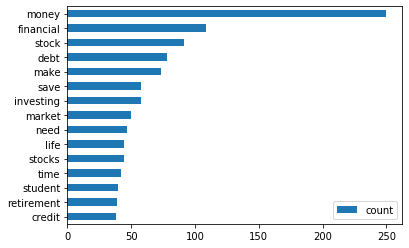

In [458]:
# words with their counts
money_avg_claps.sort_values("count").plot.barh(y = "count"); # see the number of claps of articles with these top words on average.

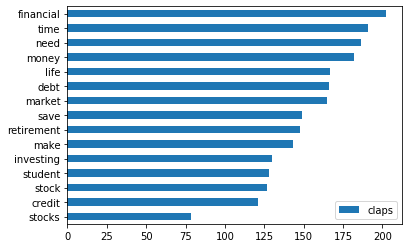

In [459]:
# words with their counts
money_avg_claps.sort_values("claps").plot.barh(y = "claps");
# see the number of claps of articles with these top words on average.

### Politics Analysis:

In [447]:
#remove nan titles:
poli = politics[~pd.isnull(politics["title"])]
poli = poli[~pd.isnull(poli["claps"])]

In [478]:
#average number of claps
average_claps = poli.claps.mean()
average_claps

130.73805202661828

In [443]:
politics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3414 entries, 0 to 3639
Data columns (total 12 columns):
url           3414 non-null object
title         3306 non-null object
author        3369 non-null object
username      3369 non-null object
user_since    3350 non-null float64
following     3369 non-null float64
followers     3374 non-null float64
published     3369 non-null object
claps         3414 non-null int64
text          3414 non-null object
tags          3414 non-null object
clap_ratio    3374 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 346.7+ KB


In [461]:
#using the functions defined above

politics_titles = (poli.title.astype(str)+ " ").sum()
pol_words = remove_punc(politics_titles)
top_pol = remove_stops(pol_words)
pol_avg_claps = get_average_claps(top_pol, poli)
pol_avg_claps

,claps,count
trump,137.859155,426.0
us,131.084746,413.0
trumps,116.000000,2.0
america,155.405405,222.0
politics,108.879121,91.0
new,93.055046,109.0
political,83.626667,75.0
american,174.680412,97.0
war,136.096774,155.0
democracy,108.318841,69.0


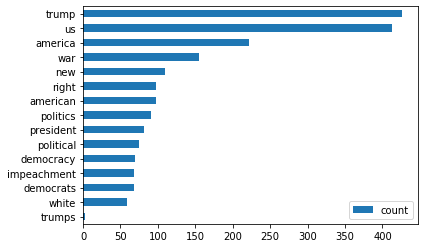

In [463]:
# words with their counts
pol_avg_claps.sort_values("count").plot.barh(y = "count"); # see the number of claps of articles with these top words on average.

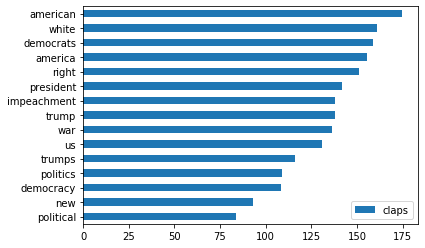

In [464]:
# words with their counts
pol_avg_claps.sort_values("claps").plot.barh(y = "claps");
# see the number of claps of articles with these top words on average.

Looking at the data it seems as though there are definite words which show up more often than other words, and tend to relate well to the topic at hand. Money is self explanatory, but the politics most popular title word is trump followed closely by us which is a bit interesting. Medium could be focused on more domestic politics as it relates to the US which could be the cause of this large count. It would be a good idea to explore impeachment and its usage over time to see the surge of articles written about it over time. Also, stocks has a below average number of claps in the money tag. Does this mean that tagging your article could be associated with less claps? It may be possible that clap number is more skewed due to more polarized views on the topic and claps could be used/withheld for political reasons. We do not know the semantics of the articles as well and knowing, for example, if articles with a negative view on trump vs a positive view on trump could be something interesting to explore